In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

%config InlineBackend.figure_format = 'svg'

In [3]:
movie_df = pd.read_pickle("main_movie_df.pkl")

In [4]:
movie_df[movie_df.international_box_office > 1000]

,movie_title,runtime,genres,rating,domestic_box_office,international_box_office,domestic_opening_weekend,budget,release_date,criticscore,...,actors,genres_1,months,G,PG,PG-13,Adventure,Comedy,Drama,directors_1
0,Star Wars: Episode VII - The Force Awakens,138,"'Adventure', 'Adventure', 'Sci-Fi'",PG-13,936.662225,1131.793436,247.966675,245.0,2015-12-18,80,...,"['Daisy Ridley', 'John Boyega', 'Oscar Isaac']",'Adventure',12,0,0,1,1,0,0,1
1,Avatar,162,"'Adventure', 'Adventure', 'Fantasy', 'Sci-Fi'",PG-13,760.507625,2083.806217,77.025481,237.0,2009-12-18,83,...,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",'Adventure',12,0,0,1,1,0,0,1
3,Jurassic World,124,"'Adventure', 'Adventure', 'Sci-Fi'",PG-13,652.385625,1018.130819,208.806270,150.0,2015-06-12,59,...,"['Chris Pratt', 'Bryce Dallas Howard', 'Ty Sim...",'Adventure',6,0,0,1,1,0,0,0
7,The Lion King,118,"'Adventure', 'Animation', 'Drama', 'Family', '...",PG,543.638043,1114.232943,191.770759,260.0,2019-07-19,55,...,"['Donald Glover', 'Beyoncé', 'Seth Rogen']",'Adventure',7,0,1,0,1,0,0,1
104,The Fate of the Furious,136,"'Adventure', 'Adventure', 'Crime', 'Thriller'",PG-13,226.008385,1009.996733,98.786705,250.0,2017-04-14,56,...,"['Vin Diesel', 'Jason Statham', 'Dwayne Johnson']",'Adventure',4,0,0,1,1,0,0,1


In [5]:
nooutliers_df = movie_df[movie_df['international_box_office'] < 1000]

In [6]:
nooutliers_df

,movie_title,runtime,genres,rating,domestic_box_office,international_box_office,domestic_opening_weekend,budget,release_date,criticscore,...,actors,genres_1,months,G,PG,PG-13,Adventure,Comedy,Drama,directors_1
2,Black Panther,134,"'Adventure', 'Adventure', 'Sci-Fi'",PG-13,700.426566,647.171407,202.003951,700.059566,2018-02-16,88,...,"['Chadwick Boseman', 'Michael B. Jordan', ""Lup...",'Adventure',2,0,0,1,1,0,0,1
4,The Avengers,143,"'Adventure', 'Adventure', 'Sci-Fi'",PG-13,623.357910,895.457605,207.438708,220.000000,2012-05-04,69,...,"['Robert Downey Jr.', 'Chris Evans', 'Scarlett...",'Adventure',5,0,0,1,1,0,0,1
5,Star Wars: Episode VIII - The Last Jedi,152,"'Adventure', 'Adventure', 'Fantasy', 'Sci-Fi'",PG-13,620.181382,712.517448,220.009584,317.000000,2017-12-15,84,...,"['Daisy Ridley', 'John Boyega', 'Mark Hamill']",'Adventure',12,0,0,1,1,0,0,1
6,Incredibles 2,118,"'Adventure', 'Adventure', 'Animation', 'Comedy...",PG,608.581744,634.507500,182.687905,608.581744,2018-06-15,80,...,"['Craig T. Nelson', 'Holly Hunter', 'Sarah Vow...",'Adventure',6,0,1,0,1,0,0,1
8,The Dark Knight,152,"'Adventure', 'Crime', 'Drama', 'Thriller'",PG-13,534.858444,471.115201,158.411483,185.000000,2008-07-18,84,...,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",'Adventure',7,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,Grudge Match,113,"'Comedy', 'Drama', 'Sport'",PG-13,29.807260,15.100000,7.021993,40.000000,2013-12-25,35,...,"['Robert De Niro', 'Sylvester Stallone', 'Kim ...",'Comedy',12,0,0,1,0,1,0,1
1539,The Hate U Give,133,"'Crime', 'Drama'",PG-13,29.719483,5.214526,0.512035,23.000000,2018-10-19,81,...,"['Amandla Stenberg', 'Regina Hall', 'Russell H...",Others,10,0,0,1,0,0,0,0
1540,When the Bough Breaks,107,"'Drama', 'Thriller'",PG-13,29.747603,0.910784,14.202323,10.000000,2016-09-09,28,...,"['Morris Chestnut', 'Regina Hall', 'Romany Mal...",'Drama',9,0,0,1,0,0,1,0
1541,Did You Hear About the Morgans?,103,"'Comedy', 'Drama', 'Romance'",PG-13,29.580087,55.700163,6.616571,58.000000,2009-12-18,27,...,"['Hugh Grant', 'Sarah Jessica Parker', 'Sam El...",'Comedy',12,0,0,1,0,1,0,0


In [7]:
from sklearn.model_selection import KFold

features, target = [['runtime', 'budget', 'criticscore', 'months', 'Adventure', 'directors_1'], 'international_box_office']
X, y = nooutliers_df[features], nooutliers_df[target]

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) 

X, y = np.array(X), np.array(y)

In [8]:
X.shape

(1211, 6)

In [9]:
X_test.shape

(303, 6)

In [10]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)

train_linear_r2s, train_ridge_r2s, train_poly_r2s, train_lasso_r2s, train_poly_lasso_r2s = [], [], [], [], []
val_linear_r2s, val_ridge_r2s, val_poly_r2s, val_lasso_r2s, val_poly_lasso_r2s = [], [], [], [], []

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    lm = LinearRegression()
    lm_ridge = Ridge(alpha=1)
    lm_lasso = Lasso(alpha=0.20255019392306675)
    lm_poly = LinearRegression()

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    #linear regression
    lm.fit(X_train, y_train)
    preds = lm.predict(X_train) 
    linear_train_rmse = mean_squared_error(y_train, preds, squared=False)
    linear_train_mae = mean_absolute_error(y_train, preds)
    
    preds = lm.predict(X_val) 
    linear_val_rmse = mean_squared_error(y_val, preds, squared=False)
    linear_val_mae = mean_absolute_error(y_val, preds)
    
    train_linear_r2s.append(lm.score(X_train, y_train))
    val_linear_r2s.append(lm.score(X_val, y_val))

    #polynomial regression
    lm_poly.fit(X_train_poly, y_train)
    preds = lm_poly.predict(X_train_poly) 
    poly_train_rmse = mean_squared_error(y_train, preds, squared=False)
    poly_train_mae = mean_absolute_error(y_train, preds)
    
    preds = lm_poly.predict(X_val_poly) 
    poly_val_rmse = mean_squared_error(y_val, preds, squared=False)
    poly_val_mae = mean_absolute_error(y_val, preds)
    
    train_poly_r2s.append(lm_poly.score(X_train_poly, y_train))
    val_poly_r2s.append(lm_poly.score(X_val_poly, y_val))
 
    #polynomial lasso regression
    X_train_poly_scaled = scaler.fit_transform(X_train_poly)
    X_val_poly_scaled = scaler.transform(X_val_poly)

    lasso = LassoCV()
    lasso.fit(X_train_poly_scaled,y_train)
    train_poly_lasso_r2s.append(lasso.score(X_train_poly_scaled,y_train))
    val_poly_lasso_r2s.append(lasso.score(X_val_poly_scaled, y_val))
    
    #ridge regression
    lm_ridge.fit(X_train_scaled, y_train)
    preds = lm_ridge.predict(X_train_scaled) 
    ridge_train_rmse = mean_squared_error(y_train, preds, squared=False)
    ridge_train_mae = mean_absolute_error(y_train, preds)
    
    preds = lm_ridge.predict(X_val_scaled) 
    ridge_val_rmse = mean_squared_error(y_val, preds, squared=False)
    ridge_val_mae = mean_absolute_error(y_val, preds)
    
    train_ridge_r2s.append(lm_ridge.score(X_train_scaled, y_train))
    val_ridge_r2s.append(lm_ridge.score(X_val_scaled, y_val))
    
    #lasso regression
    lm_lasso.fit(X_train_scaled, y_train)
    preds = lm_lasso.predict(X_train_scaled) 
    lasso_train_rmse = mean_squared_error(y_train, preds, squared=False)
    lasso_train_mae = mean_absolute_error(y_train, preds)
    
    preds = lm_lasso.predict(X_val_scaled) 
    lasso_val_rmse = mean_squared_error(y_val, preds, squared=False)
    lasso_val_mae = mean_absolute_error(y_val, preds)
    
    train_lasso_r2s.append(lm_lasso.score(X_train_scaled, y_train))
    val_lasso_r2s.append(lm_lasso.score(X_val_scaled, y_val))
        

print('Simple regression training scores: ', train_linear_r2s)
print('Simple regression validation scores: ', val_linear_r2s, '\n')

print('Polynomial regression training scores: ', train_poly_r2s)
print('Polynomial regression validation scores: ', val_poly_r2s, '\n')

print('Polynomial LASSO training scores: ', train_poly_lasso_r2s)
print('Polynomial LASSO validation scores: ', val_poly_lasso_r2s, '\n')

print('Ridge training scores: ', train_ridge_r2s)
print('Ridge validation scores: ', val_ridge_r2s, '\n')

print('Lasso training scores: ', train_lasso_r2s)
print('Lasso validation scores: ', val_lasso_r2s, '\n')

print(f'Simple regression training mean cv r^2: {np.mean(train_linear_r2s):.3f} +- {np.std(train_linear_r2s):.3f}')
print("Simple regression training rmse:", linear_train_rmse)
print("Simple regression training mae:",linear_train_mae, '\n')

print(f'Simple regression validation mean cv r^2: {np.mean(val_linear_r2s):.3f} +- {np.std(val_linear_r2s):.3f}')
print("Simple regression validation rmse:",linear_val_rmse)
print("Simple regression validation mae:",linear_val_mae, '\n')

print(f'Poly regression training mean cv r^2: {np.mean(train_poly_r2s):.3f} +- {np.std(train_poly_r2s):.3f}')
print("Poly regression training rmse:", poly_train_rmse)
print("Poly regression training mae:",poly_train_mae, '\n')

print(f'Poly regression validation mean cv r^2: {np.mean(val_poly_r2s):.3f} +- {np.std(val_poly_r2s):.3f}')
print("Poly regression validation rmse:",poly_val_rmse)
print("Poly regression validation mae:",poly_val_mae, '\n')

print(f'Lasso training mean cv r^2: {np.mean(train_lasso_r2s):.3f} +- {np.std(train_lasso_r2s):.3f}')
print("Lasso regression training rmse:", lasso_train_rmse)
print("Lasso regression training mae:",lasso_train_mae, '\n')

print(f'Lasso validation mean cv r^2: {np.mean(val_lasso_r2s):.3f} +- {np.std(val_lasso_r2s):.3f}')
print("Lasso regression validation rmse:",lasso_val_rmse)
print("Lasso regression validation mae:",lasso_val_mae, '\n')

print(f'Ridge training mean cv r^2: {np.mean(train_ridge_r2s):.3f} +- {np.std(train_ridge_r2s):.3f}')
print("Ridge regression training rmse:",ridge_train_rmse)
print("Ridge regression training mae:",ridge_train_mae, '\n')

print(f'Ridge validation mean cv r^2: {np.mean(val_ridge_r2s):.3f} +- {np.std(val_ridge_r2s):.3f}')
print("Ridge regression validation rmse:",ridge_val_rmse)
print("Ridge regression validation mae:",ridge_val_mae, '\n')

print(f'Polynomial LASSO training mean cv r^2: {np.mean(train_poly_lasso_r2s):.3f} +- {np.std(train_poly_lasso_r2s):.3f}')
print(f'Polynomial LASSO validation mean cv r^2: {np.mean(val_poly_lasso_r2s):.3f} +- {np.std(val_poly_lasso_r2s):.3f}')


Simple regression training scores:  [0.5365823236482932, 0.5294260272313216, 0.4974693406560551, 0.5310855244037995, 0.5336283031301099]
Simple regression validation scores:  [0.4815411777890254, 0.4928418790940712, 0.6267711324686684, 0.4755186037142278, 0.48181438935806553] 

Polynomial regression training scores:  [0.5742512052902484, 0.5758689072538945, 0.550465377092196, 0.5793255695905732, 0.5785609859535064]
Polynomial regression validation scores:  [0.5370224077299224, 0.5078393124550291, 0.6139047545569982, 0.4861916216382397, 0.48923365542447717] 

Polynomial LASSO training scores:  [0.558642757711364, 0.5721395218798897, 0.5341086244420441, 0.5723279573766538, 0.5726272439275866]
Polynomial LASSO validation scores:  [0.5183458070305884, 0.5101500520103943, 0.656602667743976, 0.48732135647541963, 0.5007480336574961] 

Ridge training scores:  [0.5365816845751374, 0.529425554205315, 0.4974688561352305, 0.531085041062527, 0.5336277610487382]
Ridge validation scores:  [0.48177431

In [11]:
lm = LinearRegression()
lm.fit(X,y)
preds = lm.predict(X_test)

linear_test_rmse = mean_squared_error(y_test, preds, squared=False)
linear_test_mae = mean_absolute_error(y_test, preds)

linear_test_r2 = lm.score(X_test, y_test)
linear_preds = lm.predict(X_test)

print(linear_test_rmse)
print(linear_test_mae)
print(linear_test_r2)

100.94923058534339
67.57890712640757
0.5838682173768817


In [12]:
lm_poly = LinearRegression()
poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(X)
X_test_poly = poly.fit_transform(X_test)

lm_poly.fit(X_poly, y)
    
poly_preds = lm_poly.predict(X_test_poly)

poly_test_rmse = mean_squared_error(y_test, poly_preds, squared=False)
poly_test_mae = mean_absolute_error(y_test, poly_preds)
poly_test_r2 = lm_poly.score(X_test_poly, y_test)

print(poly_test_rmse)
print(poly_test_mae)
print(poly_test_r2)

93.69819508515467
60.70337844445123
0.6415015265081241


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

lm_ridge = Ridge(alpha=1)
lm_ridge.fit(X_scaled,y)

preds = lm_ridge.predict(X_test_scaled)

ridge_test_rmse = mean_squared_error(y_test, preds, squared=False)
ridge_test_mae = mean_absolute_error(y_test, preds)

ridge_test_r2 = lm_ridge.score(X_test_scaled, y_test)

print(ridge_test_rmse)
print(ridge_test_mae)
print(ridge_test_r2)

100.96559649300714
67.58918650308085
0.5837332797188046


In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.fit_transform(X_test)

lm_lasso = Lasso(alpha=0.005)
lm_lasso.fit(X_scaled, y)

lasso_preds = lm_lasso.predict(X_test_scaled)

lasso_test_r2 = lm_lasso.score(X_test_scaled, y_test)

lasso_test_rmse = mean_squared_error(y_test, lasso_preds, squared=False)
lasso_test_mae = mean_absolute_error(y_test, lasso_preds)

print(lasso_test_rmse)
print(lasso_test_mae)
print(lasso_test_r2)
print(lm_lasso.coef_)

98.73551034630559
67.40409650655384
0.6019188519966511
[14.69700176 86.01230441 13.99206793  5.62461833 10.30089164  5.4548216 ]


In [15]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

lasso = LassoCV()
lasso.fit(X_poly_scaled,y)

X_test_poly = poly.transform(X_test)
X_test_poly_scaled = scaler.transform(X_test_poly)

poly_lasso_preds = lasso.predict(X_test_poly_scaled)

poly_lasso_score = lasso.score(X_test_poly_scaled, y_test)
poly_lasso_test_rmse = mean_squared_error(y_test, poly_lasso_preds, squared=False)
poly_lasso_test_mae = mean_absolute_error(y_test, poly_lasso_preds)

print(poly_lasso_score)
print(poly_lasso_test_rmse)
print(poly_lasso_test_mae)
print(lasso.intercept_)
list(zip(poly.get_feature_names(['runtime', 'budget', 'criticscore', 'months', 'Adventure', 'directors_1']),lm_poly.coef_))

0.625640534267689
95.74850002812575
62.7667419750619
117.40324203055329


[('1', 2.4871511072310142e-11),
 ('runtime', -2.947955999314714),
 ('budget', -0.14159595843282471),
 ('criticscore', 0.775405768780779),
 ('months', -7.347438452324464),
 ('Adventure', -16.98208941474074),
 ('directors_1', -35.72942627395788),
 ('runtime^2', 0.015502496521954017),
 ('runtime budget', 0.007583132828425066),
 ('runtime criticscore', -0.02119288409813204),
 ('runtime months', 0.03271938471001612),
 ('runtime Adventure', 0.06925194891583565),
 ('runtime directors_1', 0.5808105264970893),
 ('budget^2', -0.0024383029278251165),
 ('budget criticscore', 0.01482025749596182),
 ('budget months', 0.006016295135211433),
 ('budget Adventure', 0.593406650512234),
 ('budget directors_1', -0.026049032101416115),
 ('criticscore^2', 0.01638268947083276),
 ('criticscore months', 0.007981884375560157),
 ('criticscore Adventure', -0.0754650408666644),
 ('criticscore directors_1', -0.3495226178684454),
 ('months^2', 0.16010386078633118),
 ('months Adventure', 1.5733961318048446),
 ('months

In [16]:
final_model = list(zip(poly.get_feature_names(['runtime', 'budget', 'criticscore', 'months', 'Adventure', 'directors_1']),lm_poly.coef_))

In [18]:
a = ("intercept", 117.40324203055329)
final_model = [a] + final_model

In [19]:
final_model_df = pd.DataFrame(final_model)

In [20]:
final_model_df.rename(columns={0: "feature", 1: "coef"})

,feature,coef
0,intercept,1.174032e+02
1,1,2.487151e-11
2,runtime,-2.947956e+00
3,budget,-1.415960e-01
4,criticscore,7.754058e-01
5,months,-7.347438e+00
6,Adventure,-1.698209e+01
7,directors_1,-3.572943e+01
8,runtime^2,1.550250e-02
9,runtime budget,7.583133e-03


In [21]:
d = {'model_type': ['simple linear', 'polynomial', 'ridge', 'LASSO', 'poly LASSO'],\
     'r-squared': [linear_test_r2, poly_test_r2, ridge_test_r2, lasso_test_r2, poly_lasso_score],\
     'rmse': [linear_test_rmse, poly_test_rmse, ridge_test_rmse, lasso_test_rmse, 0],\
     'mae': [linear_test_mae, poly_test_mae, ridge_test_mae, lasso_test_mae, 0]}
df = pd.DataFrame(data=d)
df = df.style.set_caption('cv/test model cases')
df

,model_type,r-squared,rmse,mae
0,simple linear,0.583868,100.949231,67.578907
1,polynomial,0.641502,93.698195,60.703378
2,ridge,0.583733,100.965596,67.589187
3,LASSO,0.601919,98.735510,67.404097
4,poly LASSO,0.625641,0.000000,0.000000


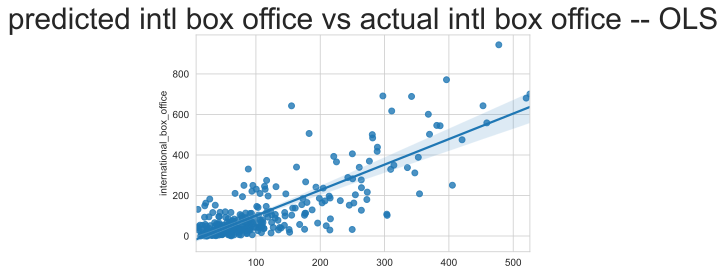

In [22]:
sns.set_style('whitegrid') 
sns.regplot(data = movie_df, x=poly_preds, y=y_test);
plt.title('predicted intl box office vs actual intl box office -- OLS', fontsize = 30);

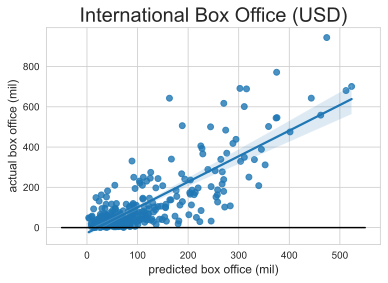

<Figure size 1080x1080 with 0 Axes>

In [23]:
sns.set_style('whitegrid') 
sns.regplot(data = movie_df, x=poly_lasso_preds, y=y_test);
plt.plot([-50, 550], [0,0], color="black")
plt.title('International Box Office (USD)', fontsize = 20)
plt.ylabel('actual box office (mil)', fontsize=12)
plt.xlabel('predicted box office (mil)', fontsize=12)

plt.figure(figsize=(15,15))
plt.savefig('model2.png');

In [17]:
std = StandardScaler() #finding best alpha for Lasso Reg
std.fit(X)

StandardScaler()

In [18]:
X_tr = std.transform(X)
X_te = std.transform(X_test)

In [19]:
alphavec = 10**np.linspace(-2,2,200)
lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [20]:
lasso_model.alpha_

0.20255019392306675

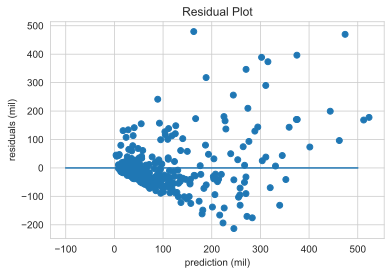

<Figure size 1080x1080 with 0 Axes>

In [32]:
residuals = y_test-poly_lasso_preds
plt.scatter(poly_lasso_preds, residuals)
plt.plot([-100, 500], [0,0])
plt.title("Residual Plot")
plt.xlabel("prediction (mil)")
plt.ylabel("residuals (mil)")
plt.figure(figsize=(15,15))
plt.savefig('residual.png');

In [22]:
act_pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': poly_lasso_preds, 'Residual': abs(y_test-poly_lasso_preds)})

In [23]:
act_pred_df[act_pred_df['Residual'].between(0,5)]

,Actual,Predicted,Residual
1167,60.874496,64.938315,4.063819
309,89.531672,93.327515,3.795843
78,53.248834,57.796680,4.547846
894,28.880479,25.700565,3.179914
1058,48.012869,52.327480,4.314611
311,53.399006,48.780177,4.618829
1188,6.213824,8.442692,2.228868
1013,27.221987,26.956446,0.265541
1223,48.023746,45.102595,2.921151
594,89.491916,93.294541,3.802625


In [45]:
act_pred_df.loc[11]

Actual       943.803672
Predicted    474.028477
Residual     469.775195
Name: 11, dtype: float64